In [1]:
## SMSSpamCollection
# location: https://mitu.co.in/dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('SMSSpamCollection.csv', sep = '\t', names=['label', 'text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

In [5]:
df.iloc[567,:]

label                                              ham
text     Oooh bed ridden ey? What are YOU thinking of?
Name: 567, dtype: object

In [6]:
df.loc[100,'text']

"Please don't text me anymore. I have nothing else to say."

In [7]:
df.loc[300,'text']

"Need a coffee run tomo?Can't believe it's that time of week already"

#### Separate the input and output data

In [8]:
# input
x = df['text']

# output
y = df['label']

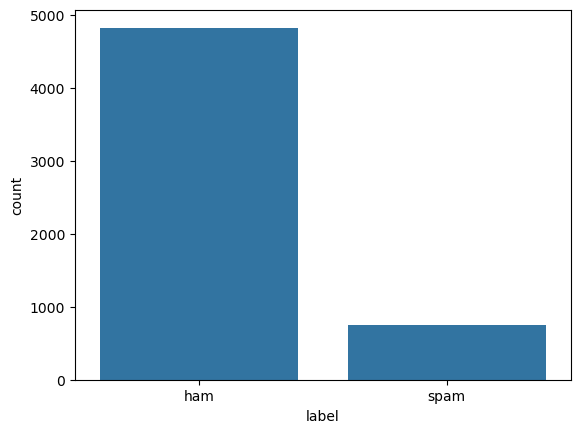

In [9]:
sns.countplot(x=y);

In [10]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

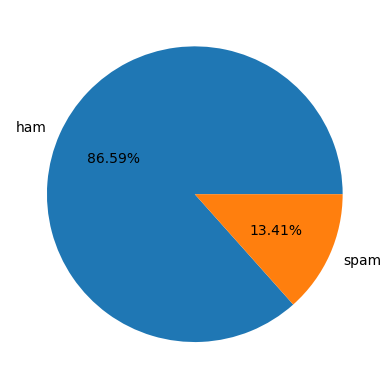

In [11]:
plt.pie(y.value_counts(), labels= y.value_counts().index,  autopct='%2.2f%%');

In [12]:
# pip install pip -U
# pip install pillow wordcloud -U

In [13]:
#filtered the spam and ham messages

spam = x[y == 'spam']
not_spam = x[y == 'ham']

In [14]:
spam

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: text, Length: 747, dtype: object

In [15]:
not_spam

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 4825, dtype: object

In [16]:
spam.shape

(747,)

In [17]:
not_spam.shape

(4825,)

In [18]:
spam = ' '.join(spam)
not_spam = ' '.join(not_spam)

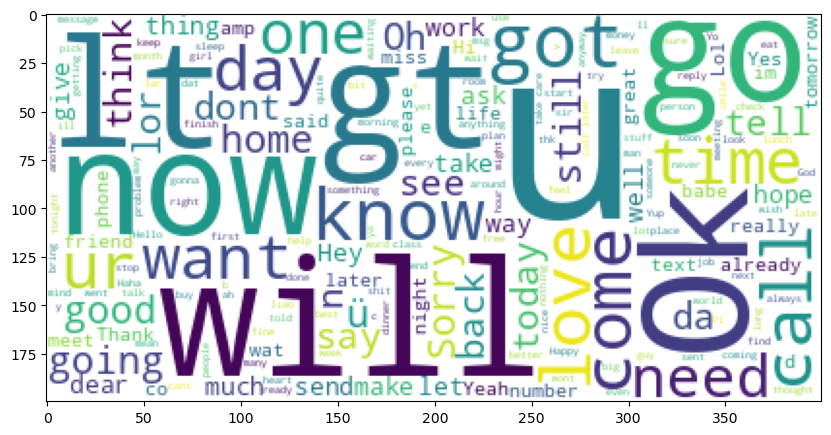

In [19]:
wc = WordCloud(background_color='white').generate(not_spam)

plt.figure(figsize=(10,9))
plt.imshow(wc, cmap ='spring')

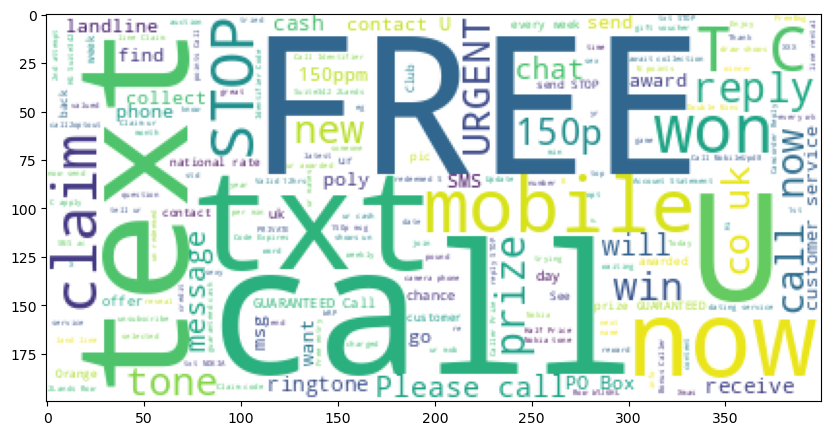

In [20]:
wc_spam = WordCloud(background_color='white').generate(spam)
plt.figure(figsize=(10,9))
plt.imshow(wc_spam, cmap ='YlOrBr')

In [21]:
wc.words_

{'u': 1.0,
 'will': 0.33096446700507615,
 'lt gt': 0.2802030456852792,
 'Ok': 0.2649746192893401,
 'now': 0.2578680203045685,
 'go': 0.25583756345177666,
 'got': 0.2365482233502538,
 'know': 0.2182741116751269,
 'come': 0.21116751269035533,
 'call': 0.20812182741116753,
 'love': 0.20609137055837565,
 'time': 0.20101522842639594,
 'ur': 0.19898477157360406,
 'day': 0.18883248730964466,
 'want': 0.18781725888324874,
 'one': 0.17766497461928935,
 'need': 0.17563451776649747,
 'going': 0.1715736040609137,
 'good': 0.166497461928934,
 'Sorry': 0.15939086294416244,
 'ü': 0.15634517766497463,
 'home': 0.15532994923857868,
 'still': 0.1532994923857868,
 'da': 0.14416243654822336,
 'see': 0.14213197969543148,
 'today': 0.1401015228426396,
 'think': 0.13401015228426397,
 'n': 0.132994923857868,
 'lor': 0.12791878172588833,
 'tell': 0.12690355329949238,
 'dont': 0.12284263959390863,
 'say': 0.12081218274111676,
 'back': 0.12081218274111676,
 'Oh': 0.11573604060913706,
 'thing': 0.1147208121827411

In [22]:
wc_spam.words_

{'FREE': 1.0,
 'call': 0.875,
 'text': 0.63,
 'U': 0.59,
 'txt': 0.5,
 'now': 0.5,
 'mobile': 0.5,
 'won': 0.365,
 'T C': 0.33,
 'claim': 0.315,
 'STOP': 0.315,
 'reply': 0.31,
 'prize': 0.305,
 'call now': 0.29,
 'URGENT': 0.28,
 'win': 0.27,
 'new': 0.27,
 'tone': 0.265,
 'co uk': 0.245,
 '150p': 0.24,
 'Please call': 0.23,
 'will': 0.22,
 'message': 0.21,
 'chat': 0.2,
 'ringtone': 0.18,
 'cash': 0.17,
 'receive': 0.165,
 'send': 0.145,
 'award': 0.14,
 'want': 0.135,
 'poly': 0.135,
 'customer service': 0.135,
 'PO Box': 0.135,
 'contact U': 0.135,
 'msg': 0.125,
 'go': 0.125,
 'SMS': 0.12,
 'landline': 0.12,
 '150ppm': 0.115,
 'find': 0.115,
 'collect': 0.115,
 'phone': 0.115,
 'GUARANTEED Call': 0.115,
 'day': 0.11,
 'uk': 0.11,
 'offer': 0.11,
 'chance': 0.11,
 'prize GUARANTEED': 0.11,
 'contact': 0.105,
 'pic': 0.105,
 'week': 0.1,
 'customer': 0.1,
 'send STOP': 0.1,
 'national rate': 0.1,
 'back': 0.095,
 'ur': 0.095,
 'awarded': 0.095,
 'See': 0.095,
 'Club': 0.095,
 'Orang

### Preparation of data for vectorization

In [23]:
# 1 . tokenize the data
# 2. remove punctuation and stopwords

In [24]:
#first checking on sample data
sent = 'Hello friends! How are you? I like Python Programming.'

In [25]:
#1. Tokenize the text
tokens1 = word_tokenize(sent)
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming',
 '.']

In [26]:
# 2. remove punctuations
tokens2 = [token for token in tokens1 if token.isalnum()]
tokens2

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'Python', 'Programming']

In [27]:
# 3. remove stopwords
swords = stopwords.words('english')

In [28]:
tokens3 = [token for token in tokens2 if token.lower() not in swords]
tokens3

['Hello', 'friends', 'like', 'Python', 'Programming']

In [29]:
# 4. stemming
ps = PorterStemmer()

tokens4 = [ps.stem(token) for token in tokens3]
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [30]:
# define analyzer function

def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalnum()]
    swords = stopwords.words('english')
    tokens3 = [token for token in tokens2 if token.lower() not in swords]
    ps = PorterStemmer()
    tokens4 = [ps.stem(token) for token in tokens3]
    return tokens4

In [31]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

In [32]:
sent1 = 'It was the expected result on that occasion.'
clean_text(sent1)

['expect', 'result', 'occas']

In [33]:
x.loc[400]

'Hmmm...k...but i want to change the field quickly da:-)i wanna get system administrator or network administrator..'

In [34]:
clean_text(x.loc[400])

['hmmm',
 'k',
 'want',
 'chang',
 'field',
 'quickli',
 'da',
 'wan',
 'na',
 'get',
 'system',
 'administr',
 'network',
 'administr']

In [35]:
x.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

### TF*IDF Vectorizer

In [36]:
# create the object
tfidf = TfidfVectorizer(analyzer=clean_text)

# apply 
x_new = tfidf.fit_transform(x)
x_new

<5572x6854 sparse matrix of type '<class 'numpy.float64'>'
	with 47556 stored elements in Compressed Sparse Row format>

In [37]:
x_new.shape   #6854 are distinct words present , these are features

(5572, 6854)

### Cross validation

In [38]:
# seperate the training and test data
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0)   #default test size

x_train.shape, x_test.shape

((4179, 6854), (1393, 6854))

In [39]:
tfidf.get_feature_names_out()

array(['0', '008704050406', '0089', ..., 'é', 'ü', '〨ud'], dtype=object)

### Building the ml classification model

In [40]:
svm = SVC(kernel='linear', random_state=0)

In [41]:
%%time
svm.fit(x_train, y_train)

CPU times: total: 469 ms
Wall time: 482 ms


SVC(kernel='linear', random_state=0)

In [42]:
y_pred = svm.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.9834888729361091


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [44]:
confusion_matrix(y_test, y_pred)

array([[1207,    1],
       [  22,  163]], dtype=int64)

<Axes: >

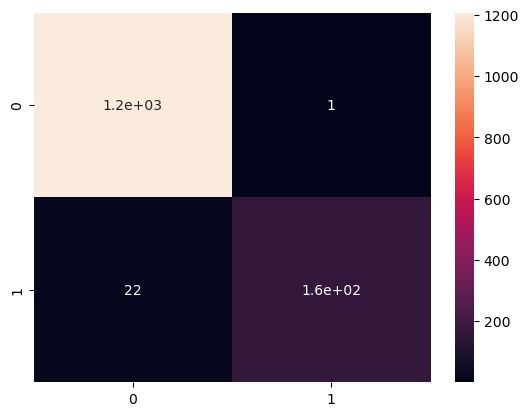

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [46]:
# RBF -> 0.9798994974874372
# Linear -> 0.9834888729361091
# Poly -> 0.9361091170136396
# Sigmoid -> 0.9806173725771715

In [47]:
df1 = pd.read_csv('sample.csv', header=None, sep='\t')
df1

,0
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [48]:
# apply 
df_new = tfidf.transform(df1[0])
df_new

<3x6854 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [49]:
y_pred = svm.predict(df_new)
y_pred

array(['ham', 'spam', 'ham'], dtype=object)